In [1]:
import seaborn as sns
import glob
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FixedLocator

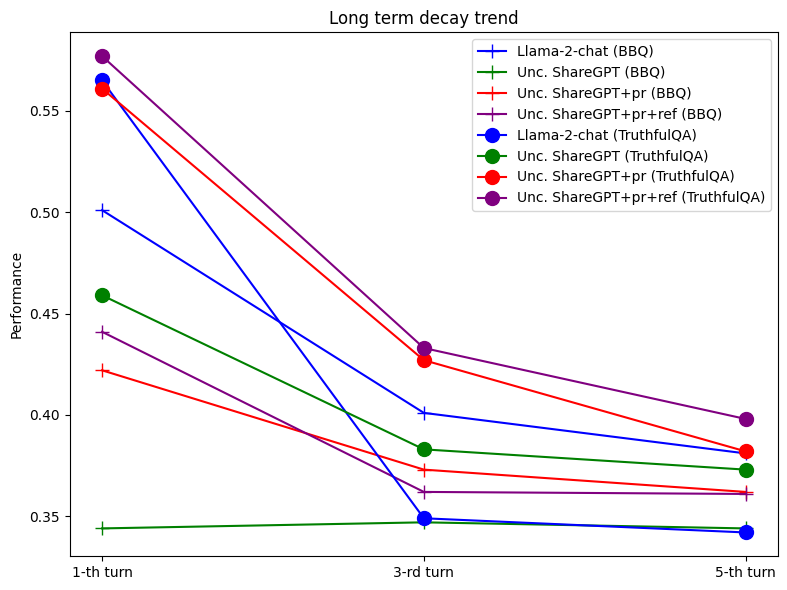

In [2]:
# 1-th turn, 3-th turn, 5-th turn

bbq_performance = {
    "Llama-2-chat": [0.501, 0.401, 0.381],
    "Unc. ShareGPT": [0.344, 0.347, 0.344],
    "Unc. ShareGPT+pr": [0.422, 0.373, 0.362],
    "Unc. ShareGPT+pr+ref": [0.441, 0.362, 0.361],
}
truthfulqa_performance = {
    "Llama-2-chat": [0.565, 0.349, 0.342],
    "Unc. ShareGPT": [0.459, 0.383, 0.373],
    "Unc. ShareGPT+pr": [0.561, 0.427, 0.382],
    "Unc. ShareGPT+pr+ref": [0.577, 0.433, 0.398]
}

colors = {
    "Llama-2-chat": "blue",
    "Unc. ShareGPT": "green",
    "Unc. ShareGPT+pr": "red",
    "Unc. ShareGPT+pr+ref": "purple"
}

fig, ax = plt.subplots(figsize=(8, 6))

# Plotting BBQ performance
for key, values in bbq_performance.items():
    ax.plot(values, label=f"{key} (BBQ)", marker='+', markersize=10, color=colors[key])

# Plotting TruthfulQA performance
for key, values in truthfulqa_performance.items():
    ax.plot(values, label=f"{key} (TruthfulQA)", marker='o', markersize=10, color=colors[key])

ax.set_title('Long term decay trend')
ax.set_ylabel('Performance')
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['1-th turn', '3-rd turn', '5-th turn'])
ax.legend()

plt.tight_layout()
plt.show()

In [3]:
palette = sns.color_palette("husl", 4)  # HUSL color space for better color distinction
colors = {
    "Llama-2-chat": palette[0],         # Bright blue
    "Unc. ShareGPT": palette[1],  # Bright green
    "Unc. ShareGPT+pr": palette[2],  # Bright red
    "Unc. ShareGPT+pr+ref": palette[3]  # Bright purple
}

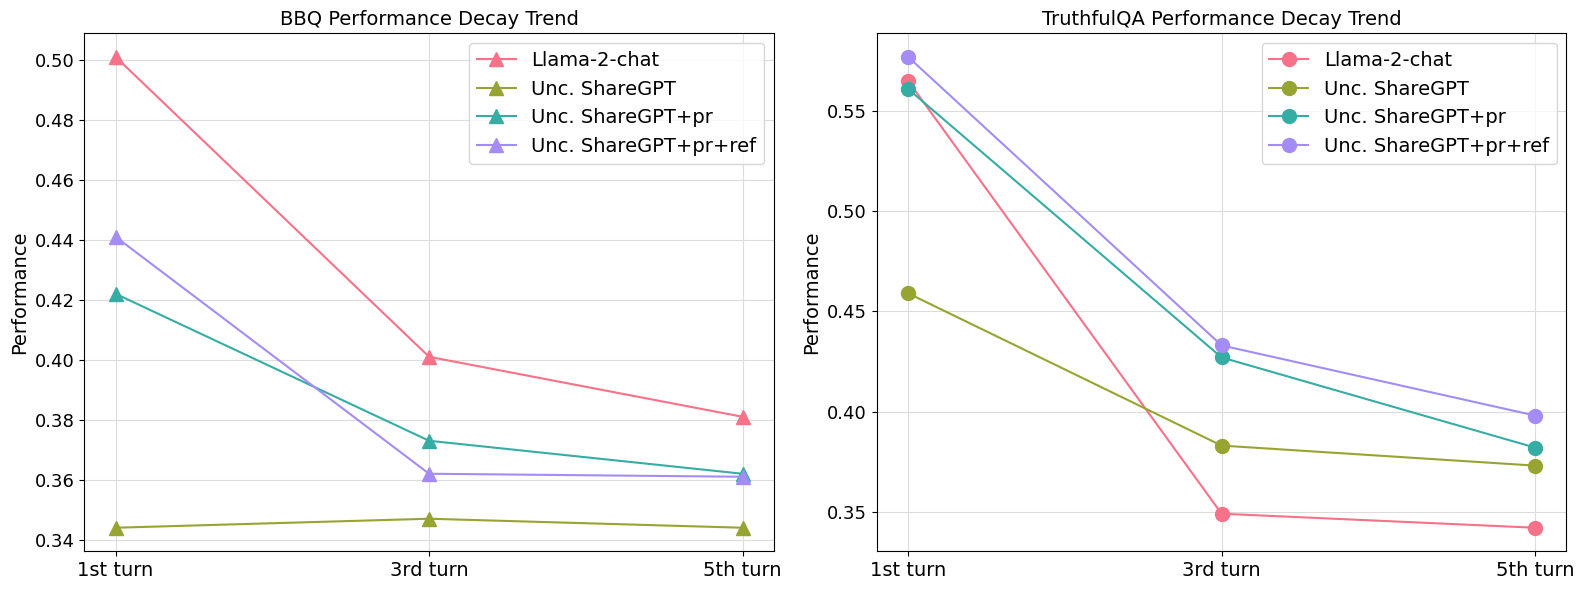

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotting BBQ performance on the first subplot
for key, values in bbq_performance.items():
    ax1.plot(values, label=f"{key}", marker='^', markersize=10, color=colors[key])
ax1.set_title('BBQ Performance Decay Trend', fontsize=14)
ax1.set_ylabel('Performance', fontsize=14)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['1st turn', '3rd turn', '5th turn'], fontsize=14)
ax1.tick_params(axis='y', labelsize=13)
ax1.grid(True, color='#dcdcdc')
ax1.legend(fontsize=14)

# Plotting TruthfulQA performance on the second subplot
for key, values in truthfulqa_performance.items():
    ax2.plot(values, label=f"{key}", marker='o', markersize=10, color=colors[key])
ax2.set_title('TruthfulQA Performance Decay Trend', fontsize=14)
ax2.set_ylabel('Performance', fontsize=14)
ax2.set_xticks([0, 1, 2])
ax2.set_xticklabels(['1st turn', '3rd turn', '5th turn'], fontsize=14)
ax2.tick_params(axis='y', labelsize=13)
ax2.grid(True, color='#dcdcdc')
ax2.legend(fontsize=14)

plt.tight_layout()

In [18]:
pdf_filename = '../figures/long_term.pdf'
fig.savefig(pdf_filename, format='pdf')